<div align="center">
    <img src='../images/duration-prediction-banner2.png' alt='duration-prediction-banner' height=400 width=900/>
</div>

# Import libraries

In [71]:
# Data manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataset

In [38]:
# Read The dataset in parquet format
df = pd.read_parquet("../dataset/green_tripdata_2023-01.parquet")

# Data Exploration & Preprocessing

In [39]:
# Show Some sample Datapoints 
df.sample(5)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
52026,2,2023-01-26 11:26:16,2023-01-26 11:37:36,N,1.0,74,168,1.0,1.63,12.1,0.0,0.5,0.0,0.0,None,1.0,13.60,2.0,1.0,0.00
29365,2,2023-01-15 15:14:12,2023-01-15 15:20:52,N,1.0,74,263,1.0,1.71,10.0,0.0,0.5,0.0,0.0,None,1.0,14.25,2.0,1.0,2.75
56633,1,2023-01-28 11:50:21,2023-01-28 11:50:42,N,1.0,92,92,0.0,0.00,2.5,0.0,1.5,0.0,0.0,None,1.0,4.00,2.0,1.0,0.00
36609,2,2023-01-19 11:28:25,2023-01-19 11:37:15,N,1.0,74,24,1.0,1.52,10.0,0.0,0.5,2.3,0.0,None,1.0,13.80,1.0,1.0,0.00
300,2,2023-01-01 06:46:18,2023-01-01 06:51:17,N,1.0,83,157,1.0,1.10,6.0,0.0,0.5,0.0,0.0,None,0.3,6.80,2.0,1.0,0.00


## Feature Details

The Data Dictionary Downloaded from this [link](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

| Feature           | Feature Description |
| :---------------- | :----------------- |
| **VendorID**      |   A code indicating the LPEP provider that provided the record.</br>1 = Creative Mobile Technologies, LLC</br>2 = Curb Mobility, LLC</br>6 = Myle Technologies Inc   |
| **lpep_pickup_datetime**          |   The date and time when the meter was engaged.   |
| **lpep_dropoff_datetime**   |  The date and time when the meter was disengaged.    |
| **store_and_fwd_flag** |  This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.   |
| **RatecodeID** |  The final rate code in effect at the end of the trip.</br>1 = Standard rate</br>2 = JFK</br>3 = Newark</br>4 = Nassau or Westchester</br>5 = Negotiated fare</br>6 = Group ride</br>99 = Null/unknown   |
| **PULocationID** |  TLC Taxi Zone in which the taximeter was engaged.   |
| **DOLocationID** |  TLC Taxi Zone in which the taximeter was disengaged.   |
| **passenger_count** |  The number of passengers in the vehicle.   |
| **trip_distance** |  The elapsed trip distance in miles reported by the taximeter.   |
| **fare_amount** |  The time-and-distance fare calculated by the meter. For additional information on the following columns, see https://www.nyc.gov/site/tlc/passengers/taxi-fare.page   |
| **extra** |  Miscellaneous extras and surcharges.   |
| **mta_tax** |  Tax that is automatically triggered based on the metered rate in use.   |
| **tip_amount** |  Tip amount – This field is automatically populated for credit card tips. Cash tips are not included.   |
| **tolls_amount** |  Total amount of all tolls paid in trip.   |
| **improvement_surcharge** |  Improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.   |
| **total_amount** |  The total amount charged to passengers. Does not include cash tips.   |
| **payment_type** |  A numeric code signifying how the passenger paid for the trip.</br>0 = Flex Fare trip</br>1 = Credit card</br>2 = Cash</br>3 = No charge</br>4 = Dispute</br>5 = Unknown</br>6 = Voided trip   |
| **trip_type** |  A code indicating whether the trip was a street-hail or a dispatch that is automatically assigned based on the metered rate in use but can be altered by the driver.</br>1 = Street-hail</br>2 = Dispatch   |
| **congestion_surcharge** |  Total amount collected in trip for NYS congestion surcharge.   |
| **cbd_congestion_fee** |  Per-trip charge for MTA's Congestion Relief Zone starting Jan. 5, 2025. <mark>(Not Important for this dataset)</mark>  |


In [40]:
# Shape of the dataset
print(f"There are {df.shape[0]} datapoints and {df.shape[1]} features in this dataset.")

There are 68211 datapoints and 20 features in this dataset.


## Check for NaN Values

In [41]:
# Check for NaN values
df.isnull().sum()

VendorID                     0
lpep_pickup_datetime         0
lpep_dropoff_datetime        0
store_and_fwd_flag        4324
RatecodeID                4324
PULocationID                 0
DOLocationID                 0
passenger_count           4324
trip_distance                0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
ehail_fee                68211
improvement_surcharge        0
total_amount                 0
payment_type              4324
trip_type                 4334
congestion_surcharge      4324
dtype: int64

**ehail_fee**  is null for each row, and also there other features with Nan value.

In [42]:
# Check Which records are null
df[df.isnull()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68207,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68208,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN
68209,NaN,NaT,NaT,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Check for number of trips with trip_type == 2
df[df.trip_type == 2].count()

VendorID                 1401
lpep_pickup_datetime     1401
lpep_dropoff_datetime    1401
store_and_fwd_flag       1401
RatecodeID               1401
PULocationID             1401
DOLocationID             1401
passenger_count          1401
trip_distance            1401
fare_amount              1401
extra                    1401
mta_tax                  1401
tip_amount               1401
tolls_amount             1401
ehail_fee                   0
improvement_surcharge    1401
total_amount             1401
payment_type             1401
trip_type                1401
congestion_surcharge     1401
dtype: int64

In [ ]:
# Check for number of trips with trip_type == 1
df[df.trip_type == 1].count()

VendorID                 62476
lpep_pickup_datetime     62476
lpep_dropoff_datetime    62476
store_and_fwd_flag       62476
RatecodeID               62476
PULocationID             62476
DOLocationID             62476
passenger_count          62476
trip_distance            62476
fare_amount              62476
extra                    62476
mta_tax                  62476
tip_amount               62476
tolls_amount             62476
ehail_fee                    0
improvement_surcharge    62476
total_amount             62476
payment_type             62476
trip_type                62476
congestion_surcharge     62476
dtype: int64

## Filter Data to only Dispatch trip type.

In [49]:
# Filter out the dataset to dispatch trip type only
df = df[df.trip_type == 2]

In [50]:
# Recheck for null values
df.isnull().sum()

VendorID                    0
lpep_pickup_datetime        0
lpep_dropoff_datetime       0
store_and_fwd_flag          0
RatecodeID                  0
PULocationID                0
DOLocationID                0
passenger_count             0
trip_distance               0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
ehail_fee                1401
improvement_surcharge       0
total_amount                0
payment_type                0
trip_type                   0
congestion_surcharge        0
dtype: int64

In [ ]:
# Drop The feature with NaN values
df.drop(columns=['ehail_fee'], inplace=True)

# Trip Duration

In [57]:
# Check if pickup-time and dropoff-time are datetime or not
df.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
payment_type                    float64
trip_type                       float64
congestion_surcharge            float64
dtype: object

In [65]:
# Calculate Duration and asign new column to the dataframe
df['duration'] = df.lpep_dropoff_datetime - df.lpep_pickup_datetime

In [68]:
# convert datetime to minutes in float to be prapare for our machine learning model
df.duration = df.duration.apply(lambda x : x.total_seconds() / 60)

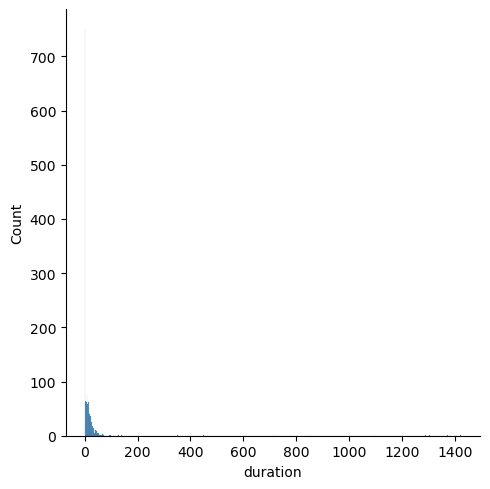

In [74]:
# Plot the distribution of the duration
sns.displot(df.duration)
plt.show()

In [78]:
# Get some Descriptive Statistics
df.duration.describe(percentiles=[.95, .98, .99])

count    1401.000000
mean       17.672698
std       101.375698
min         0.000000
50%         1.433333
95%        41.233333
98%        64.600000
99%       126.316667
max      1423.716667
Name: duration, dtype: float64

In [85]:
((df.duration >= 1) & (df.duration <= 64)).mean()

np.float64(0.502498215560314)

In [ ]:
it shows that 98% of the data is